In [3]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


# Import seeds dataset
seed_data = pd.read_table('seeds_dataset.txt', sep="\t",on_bad_lines='skip')

# set the column names
seed_data.columns = ["area", "parimeter", "compactness", "length_of_kernal", "width_of_kernal", "asymmetry", 
                "length_of_kernel_groove", "type"]

# compactness contains one nan value
seed_data['compactness'] = seed_data['compactness'].fillna(0)

# set the input variables
independent_variables = seed_data[['area', 'length_of_kernal','width_of_kernal', 'asymmetry', 'length_of_kernel_groove']]

# target value
dependent_variables = seed_data['type']

# create train, test and split
X_train, X_test, Y_train, Y_test = train_test_split(independent_variables, dependent_variables, test_size=.5, random_state=5)

In [4]:
# Create logistic regression Classification_model and fit X_train and Y_train
Classification_model = LogisticRegression()
Classification_model.fit(X_train, Y_train)

# predict target value
Y_Pred = Classification_model.predict(X_test)

# print the accuracy of our Classification_model
score = Classification_model.score(X_test, Y_test)
print("accuracy = ", score)

# predict the type with the values for area, length_of_kernal, width_of_kernal, asymmetry, length_of_kernel_groove
predictedType = Classification_model.predict([[19.3, 6.3, 3.8 , 3.4, 6.2]])

# type of seeds 1 = Kama, 2 = Rosa, 3 = Canadian
print('The predicted type is ', predictedType)

accuracy =  0.9090909090909091
The predicted type is  [2]


C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prasad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression Decision Region Boundary')

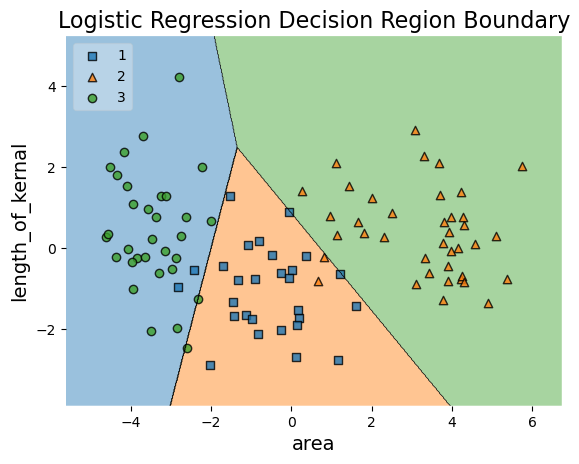

In [5]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
clf = Classification_model
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, Y_train)
plot_decision_regions(X_train2, Y_train.values, clf=clf, legend=2)

plt.xlabel(independent_variables.columns[0], size=14)
plt.ylabel(independent_variables.columns[1], size=14)
plt.title('Logistic Regression Decision Region Boundary', size=16)